In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [109]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url)

In [110]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [111]:
df.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

### Transformando dados categoricos em fatores numericos

In [112]:
df = df.rename(columns = {
    " State-gov": "state-gov", 
    " 77516": "77516",
    " Bachelors":"bachelors",
    " 13": "13",
    " Never-married": "never-married",
    " Adm-clerical": "adm-clerical",
    " Not-in-family": "not-in-family",
    " White": "white",
    " Male": "male",
    " 2174": "2174",
    " 40": "40",
    " United-States": "us",
    " <=50K": "greater_than_50k"    
})

encoder = LabelEncoder()
df['state-gov'] = encoder.fit_transform(df['state-gov'])
df['bachelors'] = encoder.fit_transform(df['bachelors'])
df['never-married'] = encoder.fit_transform(df['never-married'])
df['not-in-family'] = encoder.fit_transform(df['not-in-family'])
df['white'] = encoder.fit_transform(df['white'])
df['male'] = encoder.fit_transform(df['male'])
df['adm-clerical'] = encoder.fit_transform(df['adm-clerical'])
df['us'] = encoder.fit_transform(df['us'])
df['greater_than_50k'] = encoder.fit_transform(df['greater_than_50k'])
df['greater_than_50k'] = df['greater_than_50k'].replace({0:1, 1:0})

,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,us,greater_than_50k
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,1
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,1
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,1
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,1
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,0
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,1
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,1


### Separando treino e teste

In [113]:
X = df.drop(['greater_than_50k'], axis = 1).values
y = df[['greater_than_50k']].values

### Aplicando a normalização

In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Separando dataset, slicing

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Training model

In [157]:
models = [
    ("RF", RandomForestClassifier()),
    ("DT", DecisionTreeClassifier()),
    ("LR", LogisticRegression()),
    ("Gaussian", GaussianNB()),
    ("KNC", KNeighborsClassifier()),
    ("SVC", SVC())
]

In [158]:
trained_models = []
results = {'modelo': [], 'acuracia': [], 'precisao': [], 'recall': []}

for name, model in models:
    print('\n------------- ' + str(name)+ ' -------------')
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    
    print(metrics.confusion_matrix(y_test, y_pred, labels = [1, 0]))

    trained_models.append((name, model, metrics.accuracy_score(y_test, y_pred)))
    results['modelo'].append(name)
    results['acuracia'].append(metrics.accuracy_score(y_test, y_pred))
    results['precisao'].append(metrics.precision_score(y_test, y_pred))
    results['recall'].append(metrics.recall_score(y_test, y_pred, average='macro'))


------------- RF -------------
[[6913  541]
 [ 835 1479]]

------------- DT -------------
[[6514  940]
 [ 886 1428]]

------------- LR -------------
[[7024  430]
 [1265 1049]]

------------- Gaussian -------------
[[7102  352]
 [1532  782]]

------------- KNC -------------
[[6704  750]
 [ 955 1359]]

------------- SVC -------------
[[7026  428]
 [1044 1270]]


In [159]:
df_results = pd.DataFrame(data=results)
df_results

,modelo,acuracia,precisao,recall
0,RF,0.859132,0.892230,0.783287
1,DT,0.813063,0.880270,0.745503
2,LR,0.826474,0.847388,0.697820
3,Gaussian,0.807125,0.822562,0.645360
4,KNC,0.825450,0.875310,0.743339
5,SVC,0.849304,0.870632,0.745707


### Buscando melhor modelo baseado na acuracia

In [160]:
best_model = sorted(trained_models, key=lambda x: x[2], reverse=True)[0]
best_model

('RF', RandomForestClassifier(), 0.8591318591318591)

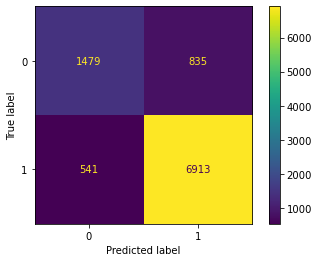

In [161]:
metrics.plot_confusion_matrix(best_model[1], X_test, y_test)  
plt.show()  

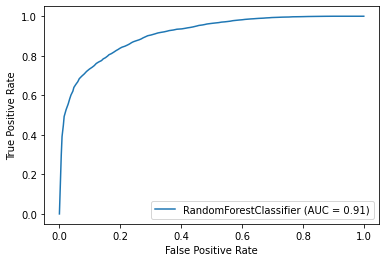

In [162]:
metrics.plot_roc_curve(best_model[1], X_test, y_test)  
plt.show()  